## Integration Errors

(a)

The trapezoidal rule scales $\propto (\Delta x)^2$ because we only use a linear approximation to the function $f(x)$. The higher order terms that constitute the error are dropped off. As $\Delta x$ becomes increasingly small, the error becomes proportional to $(\Delta x)^2$. $(\Delta x)^3$ and higher order terms have little contribution to the error.

Similarly, Simpson's rule uses a polynomial approximation to the quadratic term. However, we use the double interval $x_{i-1}<x<x_{i+1}$, and the odd terms do not contribute to the integral due to their antisymmetric shape about $x_i$. Therefore, the error is dominated by the quartic term and scales with $(\Delta x)^4$.

(b)

Let $I_1$ be the value of the integral with spacing $\Delta x$ and $I_2$ be the value of the integral with spacing $2\Delta x$. Let $\epsilon_1$ be the error associated with $I_1$ and $\epsilon_2$ be the error associated with $I_2$.
Then $I_1 + \epsilon_1 = I_2 + \epsilon_2$.

For the trapezoidal rule, we know that the error scales with $(\Delta x)^2$. Therefore, we get that $\epsilon_1 \propto (\Delta x)^2$ and $\epsilon_2 \propto 4(\Delta x)^2$. The equation then becomes:

\begin{equation}
    I_1 + (\Delta x)^2 \approx I_2 + 4(\Delta x)^2
\end{equation}

We can then isolate $(\Delta x)^2$ and replace it back with $\epsilon_1$ to get:

\begin{equation}
    \epsilon_1 \approx \frac{I_1 - I_2}{3}
\end{equation}

For Simpson's rule, we can use the same approach. This time, $\epsilon_1 \propto (\Delta x)^4$ and $\epsilon_2 \propto 16(\Delta x)^2$. The equation becomes:

\begin{equation}
    I_1 + 4(\Delta x)^2 \approx I_2 + 16(\Delta x)^2
\end{equation}

And we get that:

\begin{equation}
    \epsilon_1 \approx \frac{I_1 - I_2}{15}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Expected error scaling using trapezoidal rule:  0.0025000000000000005
Error using trapezoidal rule:  0.0006157881000476984
Expected error scaling using Simpson's rule:  6.250000000000001e-06
Error using Simpson's rule:  4.379908454336482e-06


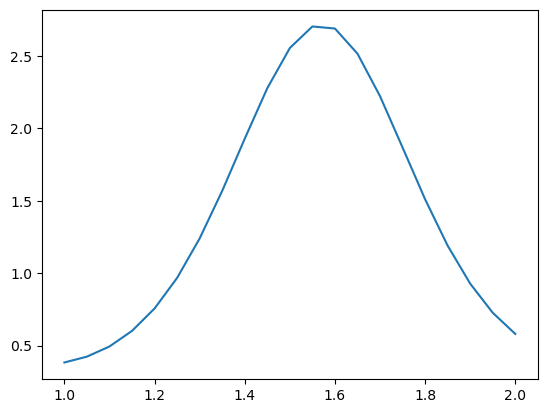

In [7]:
# (c)

# Load data into numpy array
data = np.loadtxt("hw2_data.txt", dtype='float').transpose()
x = data[0]
x2 = x[::2]
y = data[1]
y2 = y[::2]

# Trapezoidal rule
dx = (x[-1] - x[0])/(len(x)-1)
dx2 = (x2[-1] - x2[0])/(len(x2)-1)
I1t = (np.sum(y[1:-1]) + (y[0] + y[-1])/2) * dx
I2t = (np.sum(y2[1:-1]) + (y2[0] + y2[-1])/2) * dx2
e_trap = (I1t - I2t) / 3
print("Expected error scaling using trapezoidal rule: ", dx**2)
print("Error using trapezoidal rule: ", e_trap)

# Simpson's rule
I1s = (np.sum(4*y[1:-1:2]) + np.sum(2*y[2:-2:2]) + y[0] + y[-1]) * dx / 3
I2s = (np.sum(4*y2[1:-1:2]) + np.sum(2*y2[2:-2:2]) + y2[0] + y2[-1]) * dx2 / 3
e_simp = (I1s - I2s) / 15
print("Expected error scaling using Simpson's rule: ", dx**4)
print("Error using Simpson's rule: ", e_simp)

plt.plot(x, y)

It is hard to determine whether the error makes sense by simply looking at the numbers. After all, we only calculated the error for one stepsize for each method, and it does not tell us about the scaling. The error using the trapezoidal method is about 4 times smaller than the expected scaling, and the error using Simpson's method is of the same magnitude as the expected scaling.

However, we can get some intuition by looking at the plot. We can notice that for the most part, the function does not have huge variations in the slope. With the derivative being roughly constant, the trapezoidal rule is a very good approximation, which explains why the error is much smaller than expected. Therefore, we can conclude that the error does make sense.

In [11]:
# (d)

I = 1.482974344768713
true_etrap = I - I1t
true_esimp = I - I1s

# Calculate the fractional error
f_trap = abs((true_etrap - e_trap) / true_etrap)*100
f_simp = abs((true_esimp - e_simp) / true_esimp)*100

print("The trapezoidal rule has", f_trap, "% error")
print("The Simpson's rule has", f_simp, "% error")

The trapezoidal rule has 0.6177070452126326 % error
The Simpson's rule has 14.435349183408391 % error


The error estimation for the trapezoidal rule has a 0.62% difference with the true error, and the estimation for Simpson's rule has a 14.44% difference. The estimate procedure does a good job, especially the trapezoidal rule for this particular function.

## Chemical Potential of a Fermi Gas


(a)

We can greatly simplify the integral by using the following substitutions: $p=\sqrt{2m\epsilon}$ , $dp=\sqrt{m/2\epsilon} \cdot d\epsilon$ , $h = 2\pi \hbar$ , $\epsilon = xk_BT$ and $d\epsilon = k_BTdx$.

\begin{equation}
    N = V \int_{0}^{\infty} \frac{8\pi p^2 dp}{h^3} \cdot \frac{1}{1+e^{(\epsilon - \mu)/k_BT}}
\end{equation}

\begin{equation}
    \frac{N}{V} = \int_{0}^{\infty} \frac{8\pi m\ \sqrt{2m\epsilon} d\epsilon}{(2\pi \hbar)^3}
    \cdot \frac{1}{1+e^{(\epsilon - \mu)/k_BT}}
\end{equation}

\begin{equation}
    \frac{N}{V} = \int_{0}^{\infty} \frac{(mk_BT)^{3/2} \sqrt{2x} dx}{\pi^2 \hbar^3} \cdot \frac{1}{1+e^{x-\mu /k_BT}}
\end{equation}

From here, we notice that the first fraction looks a lot like $n_Q = \left(mk_BT/2\pi \hbar^2\right)^{3/2}$. We can multiply top and bottom by the missing factors and obtain:

\begin{equation}
    \frac{N}{V} = \int_{0}^{\infty} \frac{n_Q \cdot 4\sqrt{x} dx}{\sqrt{\pi}} \cdot \frac{1}{1+e^{x-\mu /k_BT}}
\end{equation}

\begin{equation}
    \frac{N}{n_QV} = \frac{4}{\sqrt{\pi}} \cdot \int_{0}^{\infty} \frac{\sqrt{x} dx}{1+e^{x-\mu /k_BT}}
\end{equation}

Above is the equation we will use to evaluate the integral numerically.

Before getting to the evaluation, let's get some intuition on the range of values we want to integrate.

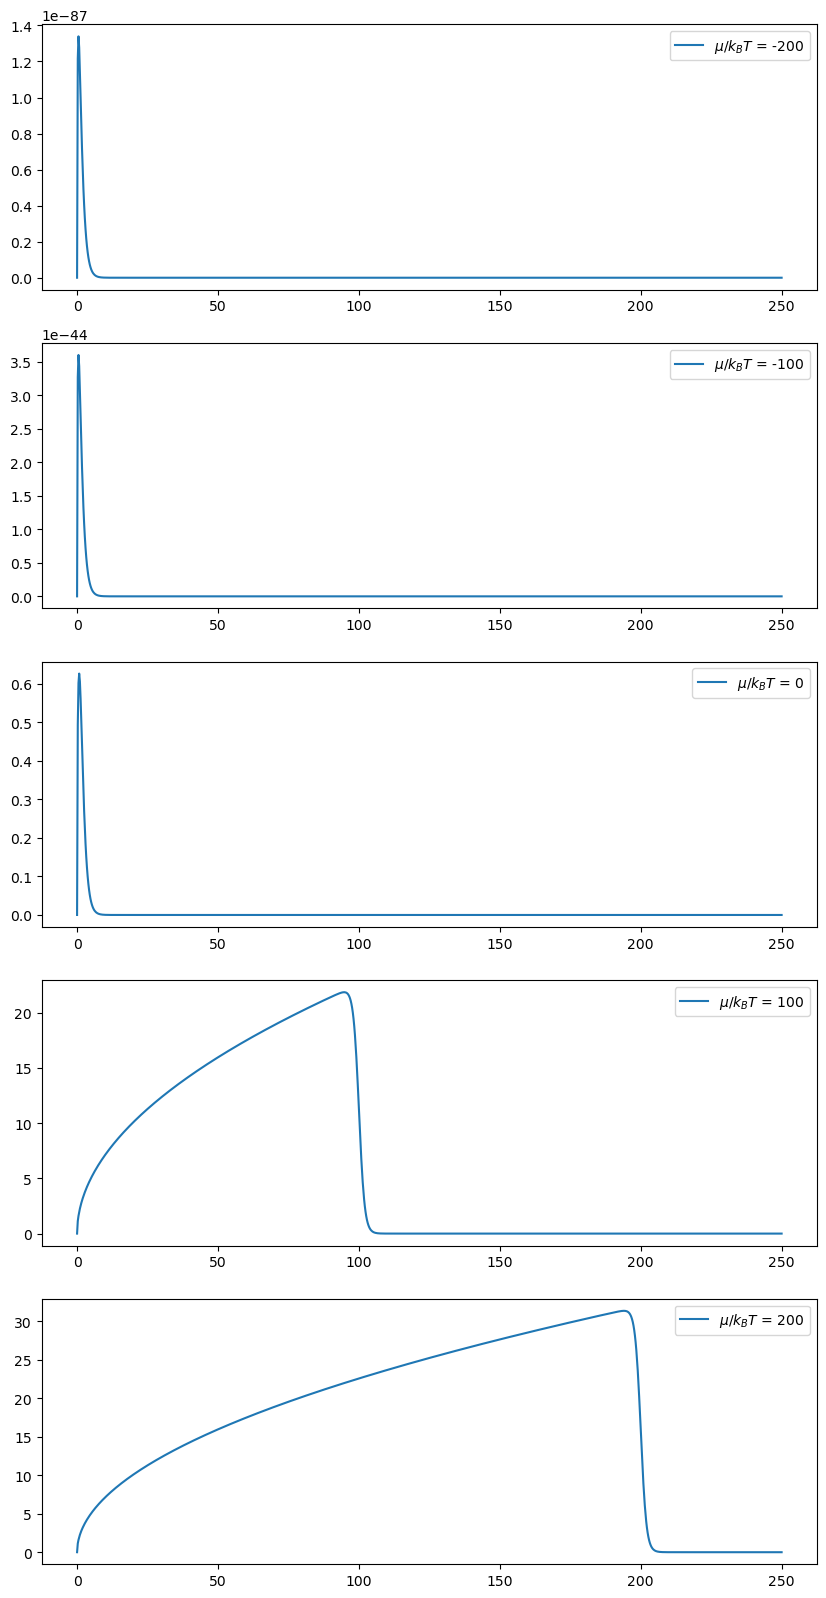

In [127]:
# Test plots for intuition
mu_test = [-200, -100, 0, 100, 200]
x_test = np.linspace(0, 250, 1000)

def f(x, m):
    return 4/np.pi**0.5 * x**0.5 / (1 + np.exp(x - m))

plt.figure(figsize=(10, 20))
for i, m in enumerate(mu_test):
    plt.subplot(5, 1, i+1)
    plt.plot(x_test, f(x_test, m), label = '$\mu/k_BT$ = '+str(m))
    plt.legend()

We can see that for negative values of $\mu/k_BT$, the curve has a sharp peak and flattens very quickly along x. Therefore, instead of integrating on a large range of x, it is more advantageous to limit the upper bound of integration to have a better resolution on the peak itself. For positive values of $\mu/k_BT$, the curve flattens sharply near $x = \mu/k_BT$. This is a good indicator of the range of integration. Therefore, we can choose the upper bound to be $x = 10$ for negative values of $ \mu/k_BT$, and $ x = \mu/k_BT + 10$ for positive values of $\mu/k_BT$.

In [137]:
import scipy.interpolate

mu = np.concatenate((-10**np.linspace(2, 0, 10), 10**np.linspace(0, 5, 10)))

# Integrate with Simpson's rule
def simpson():
    integrals = []
    dx = 0.1
    for m in mu:
        upper = 10
        if m >= 0:
            upper = m + 10
        num = int(upper/dx)
        x = np.linspace(0, upper, num)
        integrals.append((np.sum(4*f(x, m)[1:-1:2]) + np.sum(2*f(x, m)[2:-2:2]) +f(x, m)[0] + f(x, m)[-1]) * dx / 3)
    return integrals

# Interpolate
def interpolate(evals):
    xp = simpson()
    fp = mu
    spline = scipy.interpolate.CubicSpline(xp, fp)
    res = spline(evals)
    return res

In [ ]:
# (b)

# Calculate the error
